### Packages

In [1]:
import os
os.getcwd()

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
sns.set()
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
from pandas import Series
from numpy import log



### Load data

In [2]:
df = pd.read_csv('IDEA.NS_ORIGINAL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-04-2019,16.10,16.200001,15.25,15.450000,15.450000,33729371
1,02-05-2019,15.35,16.549999,15.15,16.200001,16.200001,62636435
2,03-05-2019,16.25,16.500000,15.90,16.150000,16.150000,26630328
3,06-05-2019,17.15,17.150000,16.25,16.350000,16.350000,45839027
4,07-05-2019,16.40,16.600000,15.50,15.600000,15.600000,36754853


### Pre-Processing

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [6]:
df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume
0,30-04-2019,16.10,16.200001,15.25,15.450000,15.450000,33729371
1,02-05-2019,15.35,16.549999,15.15,16.200001,16.200001,62636435
2,03-05-2019,16.25,16.500000,15.90,16.150000,16.150000,26630328
3,06-05-2019,17.15,17.150000,16.25,16.350000,16.350000,45839027


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [8]:
df_copy = df.copy()

In [9]:
df = df[['Date','Open','Close']]

In [10]:
df.head()

,Date,Open,Close
0,30-04-2019,16.10,15.450000
1,02-05-2019,15.35,16.200001
2,03-05-2019,16.25,16.150000
3,06-05-2019,17.15,16.350000
4,07-05-2019,16.40,15.600000


In [11]:
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df.head()

,Date,Open,Close
0,2019-04-30,16.10,15.450000
1,2019-05-02,15.35,16.200001
2,2019-05-03,16.25,16.150000
3,2019-05-06,17.15,16.350000
4,2019-05-07,16.40,15.600000


## EDA

In [13]:
df.head()

,Date,Open,Close
0,2019-04-30,16.10,15.450000
1,2019-05-02,15.35,16.200001
2,2019-05-03,16.25,16.150000
3,2019-05-06,17.15,16.350000
4,2019-05-07,16.40,15.600000


<Axes: xlabel='Date'>

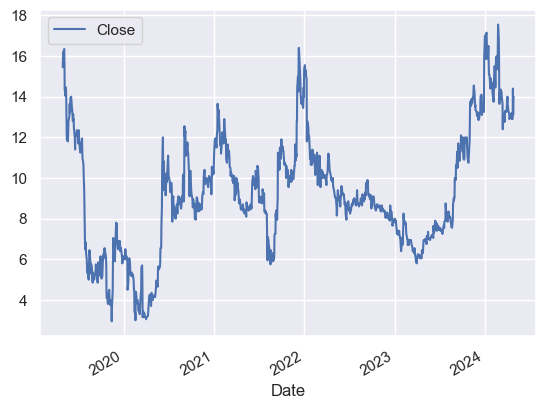

In [14]:
df.plot(x='Date', y='Close')

## Auto-correlation check: Durbin Watson test to check if it is a TSF(Time Series Forecasting) problem or not

In [15]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Close']))

## Here it is less than 2 so it is TSF problem

0.002421107776887342
0.002039435128861604


In [16]:
from pandas.tseries.offsets import BDay  # BDay - business day (Mon-Friday)

In [17]:
df.shape

(1235, 3)

In [18]:
df.head(3)

,Date,Open,Close
0,2019-04-30,16.10,15.450000
1,2019-05-02,15.35,16.200001
2,2019-05-03,16.25,16.150000


In [19]:
df.tail()

,Date,Open,Close
1230,2024-04-22,12.40,12.9
1231,2024-04-23,13.00,14.4
1232,2024-04-24,13.75,13.1
1233,2024-04-25,11.80,13.9
1234,2024-04-26,13.65,14.0


In [20]:
df1 = pd.date_range(start='2019-04-30',end='2024-04-26',freq=BDay())

In [21]:
df1

DatetimeIndex(['2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13',
               ...
               '2024-04-15', '2024-04-16', '2024-04-17', '2024-04-18',
               '2024-04-19', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26'],
              dtype='datetime64[ns]', length=1304, freq='B')

In [22]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar =USFederalHolidayCalendar())

In [23]:
us_bd

<CustomBusinessDay>

In [24]:
df1 = pd.date_range(start='2019-04-30',end='2024-04-26',freq=us_bd)

In [25]:
df1

DatetimeIndex(['2019-04-30', '2019-05-01', '2019-05-02', '2019-05-03',
               '2019-05-06', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13',
               ...
               '2024-04-15', '2024-04-16', '2024-04-17', '2024-04-18',
               '2024-04-19', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26'],
              dtype='datetime64[ns]', length=1251, freq='C')

In [26]:
# Read the CSV file into a DataFrame
df = pd.read_csv('IDEA.NS_ORIGINAL.csv', parse_dates=True, index_col=0)

# If you want to squeeze the DataFrame into a Series, use squeeze=True
df= df.squeeze()
# squeeze : True will return the index col as series

In [27]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-04-30 to 2024-04-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1235 non-null   float64
 1   High       1235 non-null   float64
 2   Low        1235 non-null   float64
 3   Close      1235 non-null   float64
 4   Adj Close  1235 non-null   float64
 5   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


## EDA

<Figure size 2000x1400 with 0 Axes>

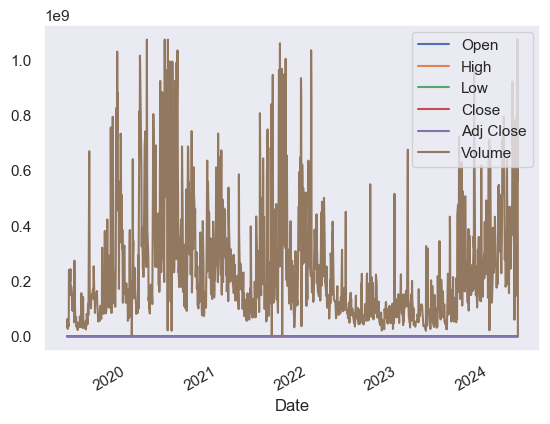

In [29]:
plt.figure(figsize=(20,14))
df.plot()
plt.grid()

<Axes: xlabel='Date', ylabel='Open'>

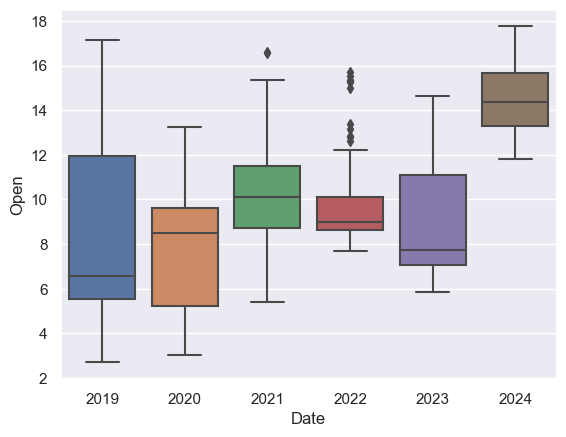

In [30]:
## Plot bloxplot of open based on year

sns.boxplot(x = df.index.year , y=df['Open'])

<Axes: xlabel='Date', ylabel='Open'>

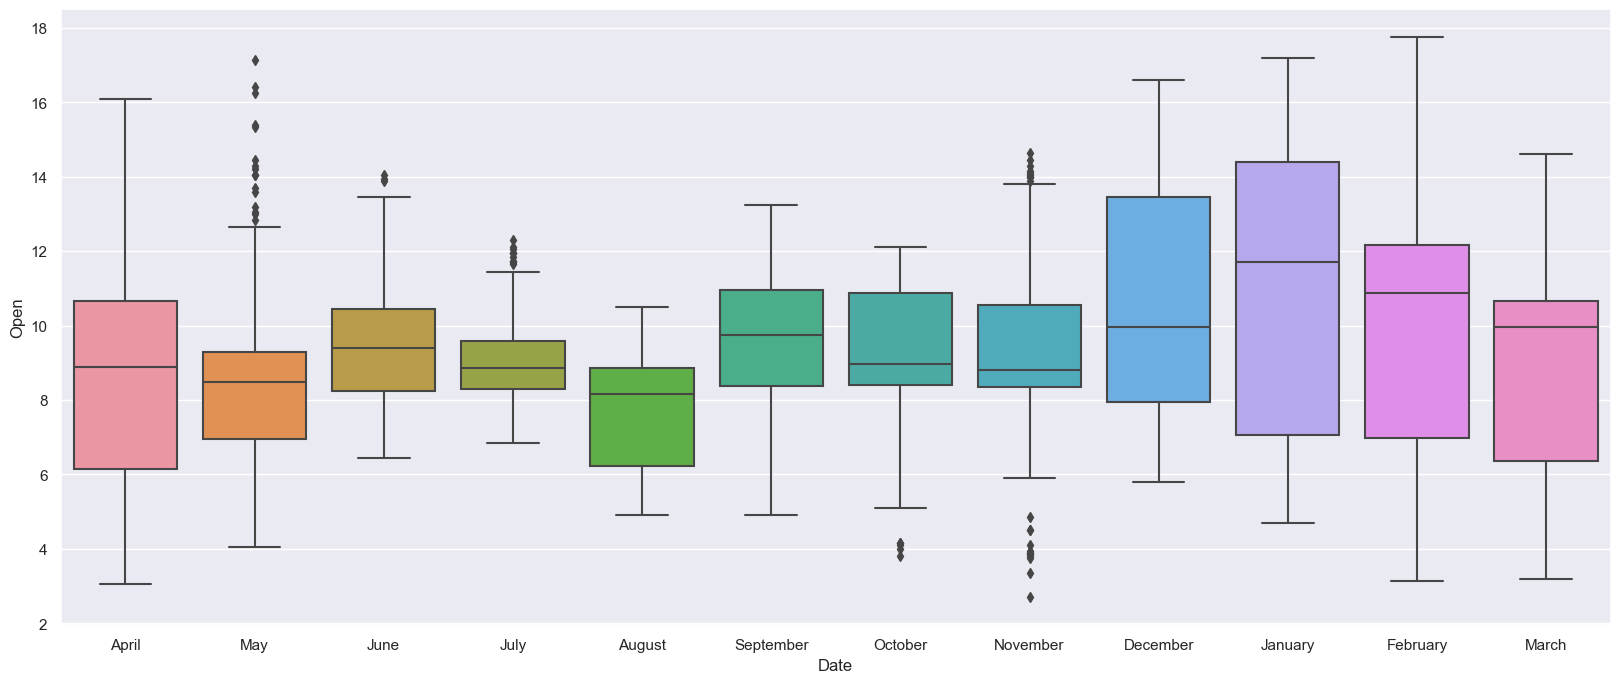

In [31]:
## Plot bloxplot of open based on months
plt.figure(figsize=(20,8))
sns.boxplot(x = df.index.month_name() , y=df['Open'])

<Axes: xlabel='Date', ylabel='Close'>

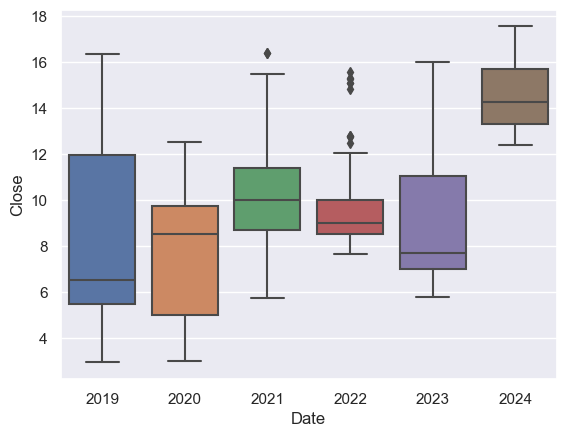

In [32]:
## Plot bloxplot of Close based on year

sns.boxplot(x = df.index.year , y=df['Close'])

<Axes: xlabel='Date', ylabel='Close'>

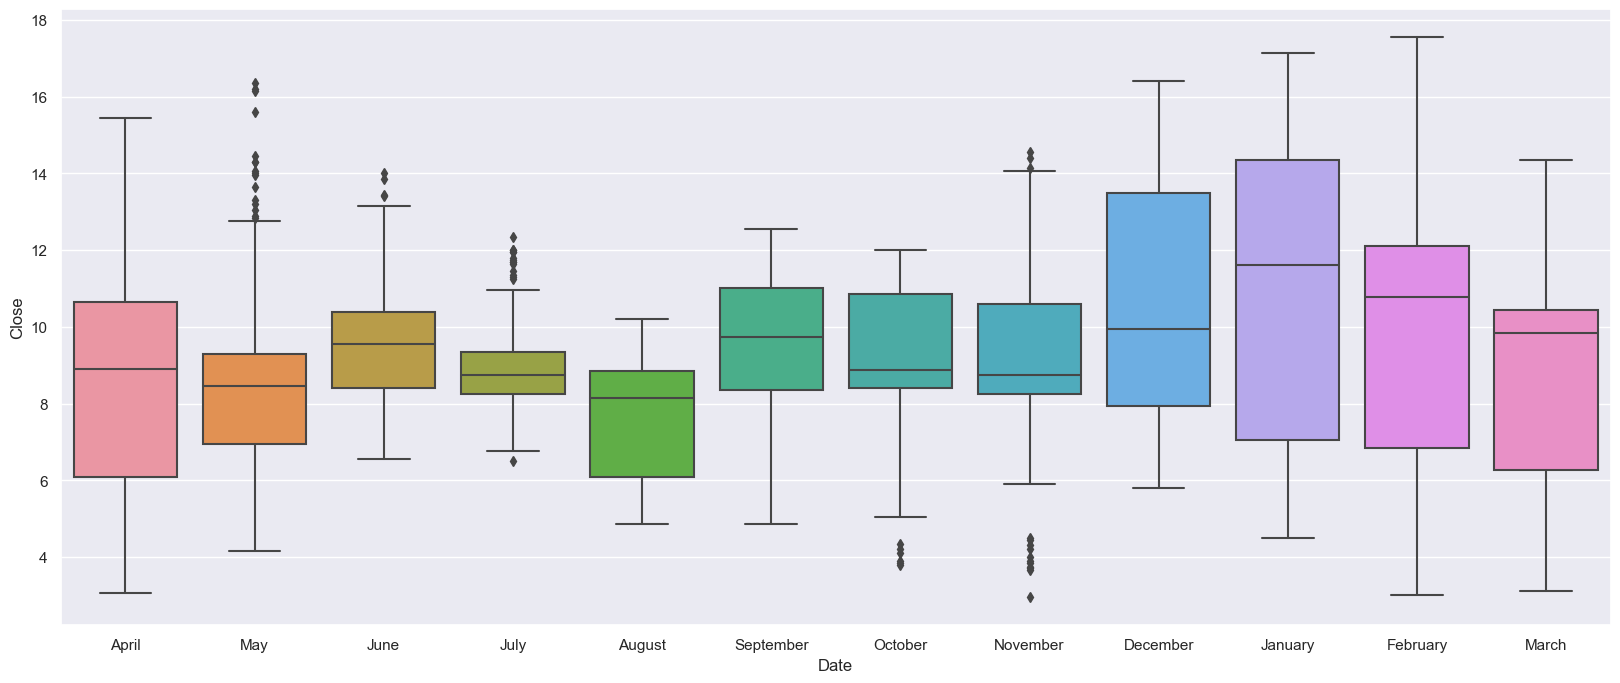

In [33]:
## Plot bloxplot of Close based on month

plt.figure(figsize=(20,8))
sns.boxplot(x = df.index.month_name() , y=df['Close'])

<Figure size 2000x800 with 0 Axes>

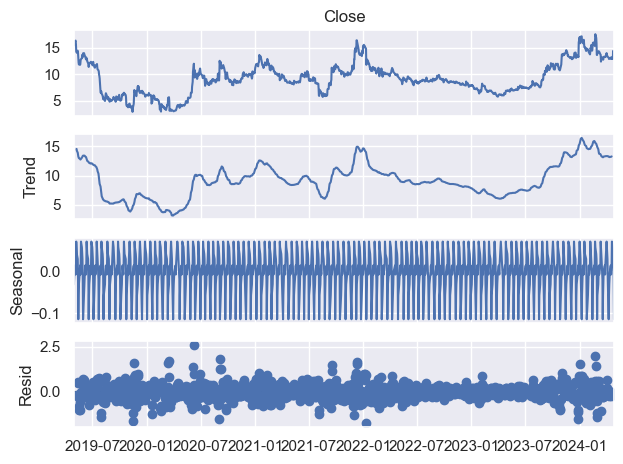

In [34]:
## Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,8))
decomposition1  = seasonal_decompose(df['Close'] ,model = 'additive', period = 12)
decomposition1.plot()
plt.show()

<Figure size 2000x800 with 0 Axes>

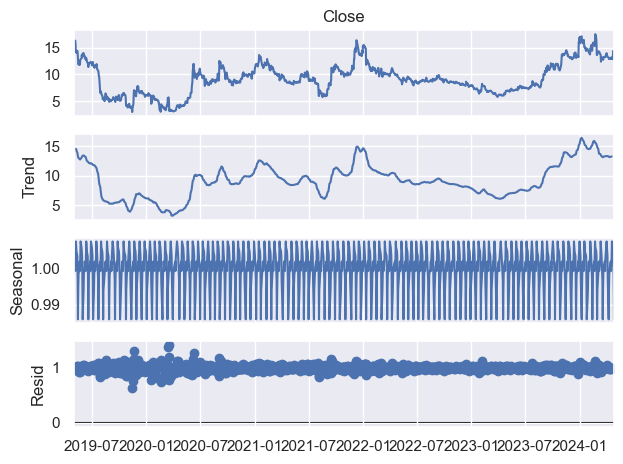

In [35]:
## Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,8))
decomposition1  = seasonal_decompose(df['Close'] ,model = 'multiplicative', period = 12)
decomposition1.plot()
plt.show()

<Figure size 2000x800 with 0 Axes>

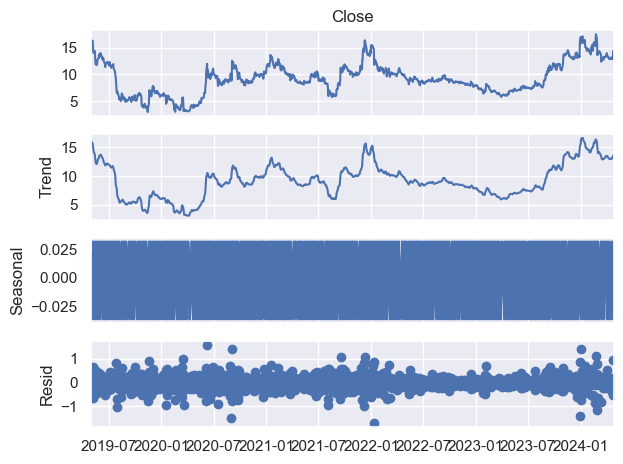

In [36]:
plt.figure(figsize=(20,8))
decomposition2  = seasonal_decompose(df['Close'] , period = 5) #Here I have taken period = 5 because in above boxplot we have seen that total continously 5 year of growth
decomposition2.plot()
plt.show()


In [37]:
trend = decomposition2.trend
seasonal = decomposition2.seasonal
residual = decomposition2.resid

In [38]:
trend

Date
2019-04-30      NaN
2019-05-02      NaN
2019-05-03    15.95
2019-05-06    15.72
2019-05-07    15.34
              ...  
2024-04-22    13.30
2024-04-23    13.44
2024-04-24    13.66
2024-04-25      NaN
2024-04-26      NaN
Name: trend, Length: 1235, dtype: float64

In [39]:
seasonal

Date
2019-04-30    0.021987
2019-05-02   -0.004274
2019-05-03   -0.036564
2019-05-06   -0.013461
2019-05-07    0.032312
                ...   
2024-04-22    0.021987
2024-04-23   -0.004274
2024-04-24   -0.036564
2024-04-25   -0.013461
2024-04-26    0.032312
Name: seasonal, Length: 1235, dtype: float64

In [40]:
residual 

Date
2019-04-30         NaN
2019-05-02         NaN
2019-05-03    0.236564
2019-05-06    0.643460
2019-05-07    0.227688
                ...   
2024-04-22   -0.421987
2024-04-23    0.964274
2024-04-24   -0.523436
2024-04-25         NaN
2024-04-26         NaN
Name: resid, Length: 1235, dtype: float64

In [41]:
print(len(trend) , trend.isnull().sum())
print(len(seasonal) , seasonal.isnull().sum())
print(len(residual) , residual.isnull().sum())

1235 4
1235 0
1235 4


In [42]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853


In [43]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Days'] = df.index.day
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days
Date,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7


In [44]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Days'] = df.index.day
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days
Date,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7


In [45]:
df['timestamp'] = df.index

In [46]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp
Date,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07
...,...,...,...,...,...,...,...,...,...,...
2024-04-22,12.40,13.050000,12.10,12.900000,12.900000,608298209,2024,4,22,2024-04-22
2024-04-23,13.00,14.750000,12.95,14.400000,14.400000,1073741823,2024,4,23,2024-04-23
2024-04-24,13.75,13.950000,13.00,13.100000,13.100000,560864623,2024,4,24,2024-04-24


In [47]:
df.shape

(1235, 10)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2019-04-30 to 2024-04-26
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1235 non-null   float64       
 1   High       1235 non-null   float64       
 2   Low        1235 non-null   float64       
 3   Close      1235 non-null   float64       
 4   Adj Close  1235 non-null   float64       
 5   Volume     1235 non-null   int64         
 6   Year       1235 non-null   int32         
 7   Month      1235 non-null   int32         
 8   Days       1235 non-null   int32         
 9   timestamp  1235 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int32(3), int64(1)
memory usage: 91.7 KB


In [49]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp
Date,,,,,,,,,,
2024-04-22,12.40,13.05,12.10,12.9,12.9,608298209,2024,4,22,2024-04-22
2024-04-23,13.00,14.75,12.95,14.4,14.4,1073741823,2024,4,23,2024-04-23
2024-04-24,13.75,13.95,13.00,13.1,13.1,560864623,2024,4,24,2024-04-24
2024-04-25,11.80,14.40,11.80,13.9,13.9,1073741823,2024,4,25,2024-04-25
2024-04-26,13.65,14.20,12.70,14.0,14.0,1376,2024,4,26,2024-04-26


In [50]:
len(df)

1235

## Train and Test Split

In [51]:
train = df[pd.to_datetime(df['timestamp']) < pd.to_datetime('2023-05-15') ]

In [52]:
test = df[pd.to_datetime(df['timestamp']) >= pd.to_datetime('2023-05-15')]

In [53]:
print(train.shape)
print(test.shape)

(1000, 10)
(235, 10)


In [54]:
train_final = train[['Close']]
test_final = test[['Close']]

In [55]:
train_final.head()

,Close
Date,
2019-04-30,15.450000
2019-05-02,16.200001
2019-05-03,16.150000
2019-05-06,16.350000
2019-05-07,15.600000


In [56]:
test_final.head()

,Close
Date,
2023-05-15,7.05
2023-05-16,7.35
2023-05-17,7.05
2023-05-18,7.00
2023-05-19,7.05


### Check for stationarity of the series at alpha <= 0.05 using appropriate statistical test(hypothetical test)

In [57]:
# Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

# there are two methods avaiable - hypothesis testing, rolling stats for checking if its TSA problem or not:

# Here we are using rolling stats


def check_stationary(timeseries):
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()
    
    #plot rolling stats
    orig = plt.plot(timeseries , color='blue',label='Original')
    mean = plt.plot(rolmean , color= 'red',label = 'rolling mean')
    std = plt.plot(rolstd , color='black',label='rolling std')
    plt.legend(loc='best')
    plt.title("Rolling Mean and Stadard Deviation - Stationary or Not!!")
    plt.show(block=False)
    
    # Perform Dickey Fuller Test
    print("Results of Dickey Fuller Test :")
    dftest = adfuller(timeseries , autolag='AIC')
    dfoutput = pd.Series(dftest[0:4] , index = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation'])
    for key, value in dftest[4].items():
        dfoutput['Critical values (%s)'%key] = value
    print(dfoutput, '\n')
    
    if dftest[1] < 0.05:
        print("Result -- > Data is stationary")
    else:
        print("Result -- > Data is non-stationary")
    
# Results of Dickey Fuller Test :
# ADF Test stats             -2.317474
# P-Value                     0.166394
# #Lags                      12.000000
# No. of Observation       1222.000000
# Critical values (1%)       -3.435713
# Critical values (5%)       -2.863908
# Critical values (10%)      -2.568031
# dtype: float64 

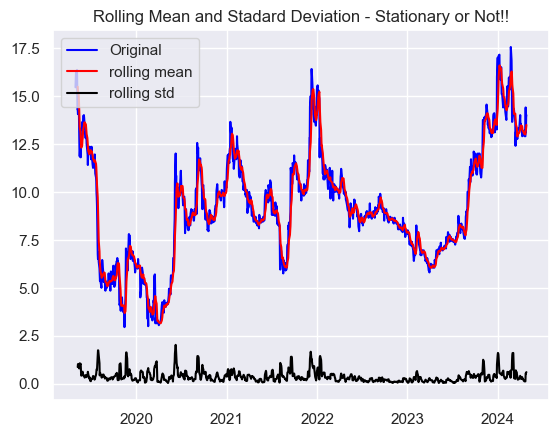

Results of Dickey Fuller Test :
ADF Test stats             -2.317474
P-Value                     0.166394
#Lags                      12.000000
No. of Observation       1222.000000
Critical values (1%)       -3.435713
Critical values (5%)       -2.863908
Critical values (10%)      -2.568031
dtype: float64 

Result -- > Data is non-stationary


In [58]:
check_stationary(df['Close'])

In [59]:
## This is hypothesis testing method

def check_adftest(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test - To check data is Stationary or Not")
    labels = ['ADF Test stats', 'P-Value','#Lags', 'No. of Observation']
    
    for i, j in zip(result, labels):
        print(j + " :-->" + str(i) )
        
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak Evidence against null hypothesis and my times series is non-stationary")

In [60]:
check_adftest(df['Close'])

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-2.317473615842129
P-Value :-->0.1663942968790854
#Lags :-->12
No. of Observation :-->1222
Weak Evidence against null hypothesis and my times series is non-stationary


In [61]:
#To make it stationary . We will do Integration approach ..

In [62]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp
Date,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07


In [63]:
df['Trend_1st_Diff'] = df['Close'] - df['Close'].shift(1)

In [64]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,Trend_1st_Diff
Date,,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30,NaN
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02,0.750001
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03,-0.050001
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06,0.200000
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07,-0.750000


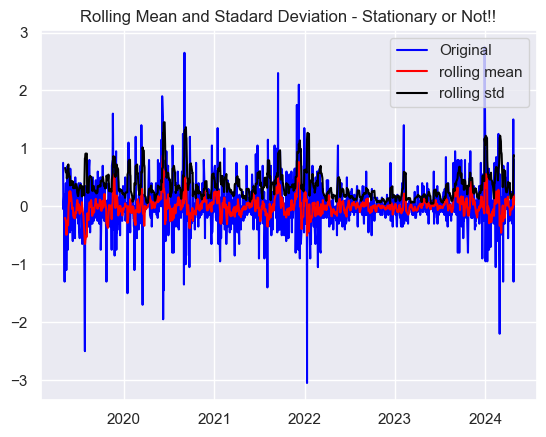

Results of Dickey Fuller Test :
ADF Test stats          -1.035028e+01
P-Value                  2.547349e-18
#Lags                    1.100000e+01
No. of Observation       1.222000e+03
Critical values (1%)    -3.435713e+00
Critical values (5%)    -2.863908e+00
Critical values (10%)   -2.568031e+00
dtype: float64 

Result -- > Data is stationary


In [65]:
check_stationary(df['Trend_1st_Diff'].dropna())

In [66]:
check_adftest(df['Trend_1st_Diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-10.350279914523028
P-Value :-->2.54734926573076e-18
#Lags :-->11
No. of Observation :-->1222
Strong evidence against null hypothesis and my time series is Stationary


In [67]:
# parameter - p d q (Trend)
# d = 1 [ how many lag(Integration step) we have done]

In [68]:
## Seasonality check

In [69]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,Trend_1st_Diff
Date,,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30,NaN
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02,0.750001
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03,-0.050001
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06,0.200000
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07,-0.750000


Since Our Data is daily so usually shift to take is 7 but it is a stock dataset where the 2 days are holiday so it is 5 .. and
Our period also contain 5 value so.. ..
We will do shift of 5

In [70]:
df['seasonality_1st_diff'] = df['Close'] - df['Close'].shift(5)

In [71]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,Trend_1st_Diff,seasonality_1st_diff
Date,,,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30,NaN,NaN
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02,0.750001,NaN
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03,-0.050001,NaN
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06,0.200000,NaN
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07,-0.750000,NaN


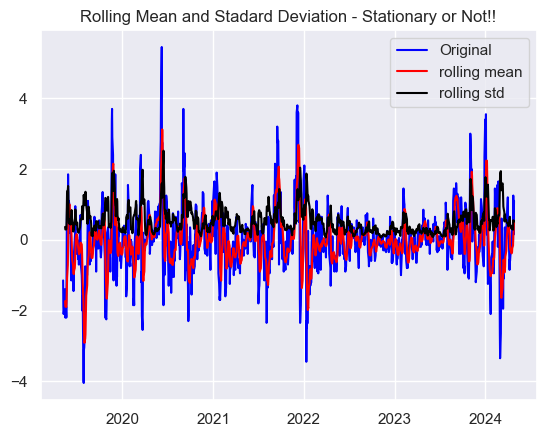

Results of Dickey Fuller Test :
ADF Test stats          -6.736013e+00
P-Value                  3.206239e-09
#Lags                    2.000000e+01
No. of Observation       1.209000e+03
Critical values (1%)    -3.435770e+00
Critical values (5%)    -2.863934e+00
Critical values (10%)   -2.568044e+00
dtype: float64 

Result -- > Data is stationary


In [72]:
check_stationary(df['seasonality_1st_diff'].dropna())

In [73]:
check_adftest(df['seasonality_1st_diff'].dropna())

Augmented Dickey Fuller Test - To check data is Stationary or Not
ADF Test stats :-->-6.7360128286866905
P-Value :-->3.2062385811949775e-09
#Lags :-->20
No. of Observation :-->1209
Strong evidence against null hypothesis and my time series is Stationary


In [74]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,Trend_1st_Diff,seasonality_1st_diff
Date,,,,,,,,,,,,
2024-04-22,12.40,13.05,12.10,12.9,12.9,608298209,2024,4,22,2024-04-22,0.0,-0.05
2024-04-23,13.00,14.75,12.95,14.4,14.4,1073741823,2024,4,23,2024-04-23,1.5,1.25
2024-04-24,13.75,13.95,13.00,13.1,13.1,560864623,2024,4,24,2024-04-24,-1.3,0.15
2024-04-25,11.80,14.40,11.80,13.9,13.9,1073741823,2024,4,25,2024-04-25,0.8,0.70
2024-04-26,13.65,14.20,12.70,14.0,14.0,1376,2024,4,26,2024-04-26,0.1,1.10


In [75]:
# parameter - p d q (seasonality)
# D = 1 [ how many lag(Integration step) we have done]

In [76]:
## NOW TREND AND SEASONALITY STATIONARY

In [77]:
## MANUAL APPROACH FOR FINDING 
# Trend:
### p :
### d : 1  [ how many lag(Integration step) we have done]
### q :

# Seasonality
### P :
### D : 1  [ how many lag(Integration step) we have done]
### Q : 

## How to calcualte parameter p/P and q/Q
### Ans : p stand for "partial autocorrelation" and we have to use autoregressive method and q we have calculated basis moving avg and it is also called autocorrelation


In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [79]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,Trend_1st_Diff,seasonality_1st_diff
Date,,,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30,NaN,NaN
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02,0.750001,NaN
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03,-0.050001,NaN
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06,0.200000,NaN
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07,-0.750000,NaN


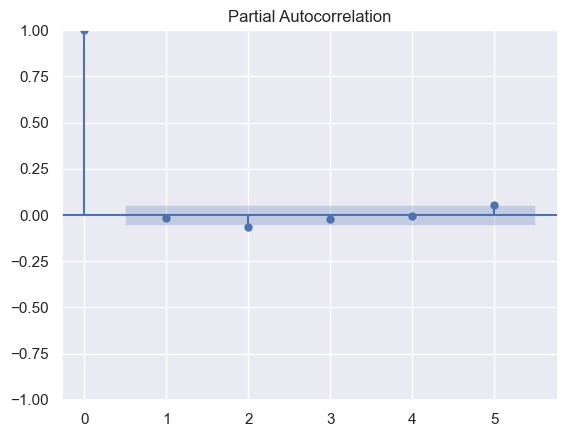

In [80]:
# p : Trend
plot_pacf(df['Trend_1st_Diff'].dropna(),lags=5) ## Here we can put lags anything it will not make impact
plt.show()

In [81]:
## From graph from start we have 0 line which is outside threshold range so p is 0 for trend

# Trend:
### p : 0
### d : 1
### q :

# Seasonality
### P :
### D : 1
### Q :  


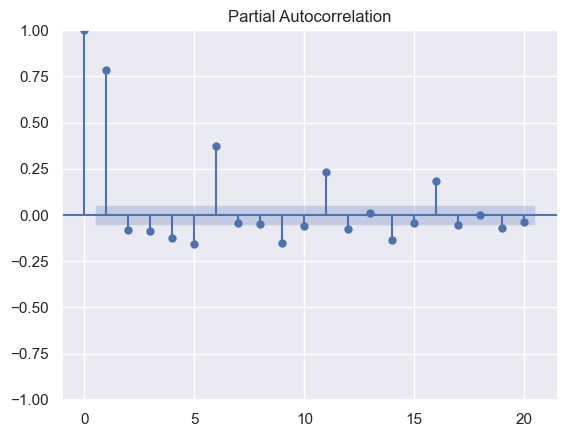

In [82]:
# P : Seasonality
plot_pacf(df['seasonality_1st_diff'].dropna(),lags=20) ## Here we can put lags anything it will not make impact
plt.show()

In [83]:
## From graph from start we have 1 line which is outside threshold range so P is 12 for seasonality

# Trend:
### p : 0
### d : 1
### q :

# Seasonality
### P : 12
### D : 1
### Q :  


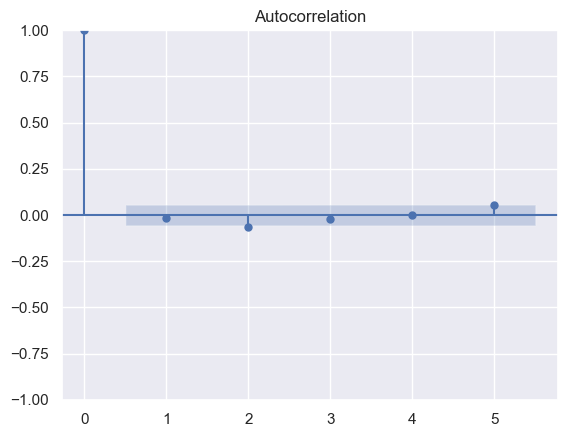

In [84]:
# q : trend
plot_acf(df['Trend_1st_Diff'].dropna(),lags=5) ## Here we can put lags anything it will not make impact
plt.show()

In [85]:
## From graph from start we have 1 line which is outside threshold range so q is 0 for trend

# Trend:
### p : 0
### d : 1
### q : 0

# Seasonality
### P : 12
### D : 1
### Q :  


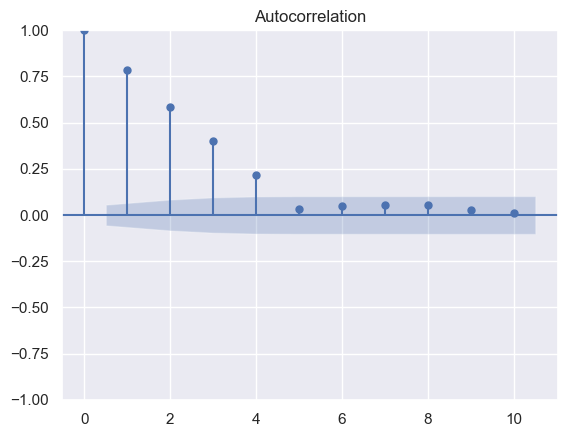

In [86]:
# Q : seosonality
plot_acf(df['seasonality_1st_diff'].dropna(),lags=10) ## Here we can put lags anything it will not make impact
plt.show()

In [87]:
## From graph from start we have 1 line which is outside threshold range so Q is  for seasonality

# Trend:
### p : 0
### d : 1
### q : 0

# Seasonality
### P : 12
### D : 1
### Q : 4


## Building Time Series Forecasting Model

#### 1. SARIMAX MODEL WHERE I AM NOT USING X FACTOR

I am using SARIMAX model because My data also has seasonality

In [88]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [89]:
model = sm.tsa.statespace.SARIMAX(df['Close'] , order=(0,1,0) , seasonal_order=(12,1,4,5))

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [90]:
result1 = model.fit()
print(result1.summary())

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                           SARIMAX Results                                           
Dep. Variable:                                         Close   No. Observations:                 1235
Model:             SARIMAX(0, 1, 0)x(12, 1, [1, 2, 3, 4], 5)   Log Likelihood                -734.368
Date:                                       Sun, 05 May 2024   AIC                           1502.737
Time:                                               13:44:39   BIC                           1589.674
Sample:                                                    0   HQIC                          1535.447
                                                      - 1235                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L5       -1.3047     

In [91]:
result1.aic

1502.7367270703646

In [92]:
# AIC : 1502.7367270703646  : Parameter: SARIMAX(0, 1, 0)x(12, 1, [1, 2, 3, 4], 5)

## MODEL EVALUATION

In [147]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,Trend_1st_Diff,seasonality_1st_diff,SARIMA_FORECAST_1
Date,,,,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30,NaN,NaN,6.944878
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02,0.750001,NaN,6.912351
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03,-0.050001,NaN,6.891842
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06,0.200000,NaN,6.902303
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07,-0.750000,NaN,6.935778


In [182]:
# df.to_csv('an.csv')

In [204]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,NON-STATIONARY,1ST DIFF,Year,Month,Days,timestamp,1st Diff,seasonality,Forecast1
Date,,,,,,,,,,,,,,,
2024-04-22,12.40,13.05,12.10,12.9,12.9,608298209,12.9,0,2024,4,22,2024-04-22,0.0,-0.55,NaN
2024-04-23,13.00,14.75,12.95,14.4,14.4,1073741823,12.9,1.5,2024,4,23,2024-04-23,1.5,0.85,NaN
2024-04-24,13.75,13.95,13.00,13.1,13.1,560864623,14.4,-1.3,2024,4,24,2024-04-24,-1.3,-0.25,NaN
2024-04-25,11.80,14.40,11.80,13.9,13.9,1073741823,13.1,0.8,2024,4,25,2024-04-25,0.8,0.60,NaN
2024-04-26,13.65,14.20,12.70,14.0,14.0,1376,13.9,0.1,2024,4,26,2024-04-26,0.1,0.85,NaN


#### TSeries is Stationary at 5% alpha value as per Dickey Fuller Test


In [63]:
import itertools

In [64]:
p = q = range(0,3)
d = range(0,1)

pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [ ]:
model_pdq = [(x[0] , x[1] , x[2] , 5) for x in list(itertools.product(p,d,q)) ]

In [65]:
for x in list(itertools.product(p,d,q)):
    print(x)

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(1, 0, 0)
(1, 0, 1)
(1, 0, 2)
(2, 0, 0)
(2, 0, 1)
(2, 0, 2)


In [66]:
import itertools
p = q = range(0,3)
d = range(0,1)
pdq = list(itertools.product(p, d, q)) # trend (pdq)

model_pdq = [(x[0], x[1],x[2], 5) for x in list(itertools.product(p, d, q))] # seasonality (PDQ)
print("Example of parameter combinations for Model.....")
print('Model : {}{}'.format(pdq[1], model_pdq[1]))
print('Model : {}{}'.format(pdq[1], model_pdq[2]))
print('Model : {}{}'.format(pdq[1], model_pdq[0]))
print('Model : {}{}'.format(pdq[0], model_pdq[1]))
print('Model : {}{}'.format(pdq[2], model_pdq[1]))

Example of parameter combinations for Model.....
Model : (0, 0, 1)(0, 0, 1, 5)
Model : (0, 0, 1)(0, 0, 2, 5)
Model : (0, 0, 1)(0, 0, 0, 5)
Model : (0, 0, 0)(0, 0, 1, 5)
Model : (0, 0, 2)(0, 0, 1, 5)


In [67]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [68]:
model_pdq

[(0, 0, 0, 5),
 (0, 0, 1, 5),
 (0, 0, 2, 5),
 (1, 0, 0, 5),
 (1, 0, 1, 5),
 (1, 0, 2, 5),
 (2, 0, 0, 5),
 (2, 0, 1, 5),
 (2, 0, 2, 5)]

## Building ARIMA MODEL

In [69]:
# creating an empty DataFrame with column names
dfobj = pd.DataFrame(columns=['Paramater', 'AIC'])

In [70]:
dfobj.columns

Index(['Paramater', 'AIC'], dtype='object')

In [71]:
dfobj.head()

,Paramater,AIC


In [72]:
from statsmodels.tsa.arima.model import ARIMA

In [73]:
paramter = []
AIC = []
for i ,  param in enumerate(pdq):
    mod = ARIMA(train_final['Close'], order=param)
    results_ARIMA = mod.fit()
    print("ARIMA{} - AIC :{}".format(param, results_ARIMA.aic))
    paramter.append(param)
    AIC.append(results_ARIMA.aic)
    

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date

ARIMA(0, 0, 0) - AIC :4803.620187143977
ARIMA(0, 0, 1) - AIC :3621.990307111969


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(0, 0, 2) - AIC :2852.430101729904
ARIMA(1, 0, 0) - AIC :1160.5500966253678


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date

ARIMA(1, 0, 1) - AIC :1162.5434309881016


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



ARIMA(1, 0, 2) - AIC :1160.402798487369
ARIMA(2, 0, 0) - AIC :1162.543768820154


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date

ARIMA(2, 0, 1) - AIC :1163.6501941556508
ARIMA(2, 0, 2) - AIC :1162.4116944017308


In [74]:
paramter

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [75]:
AIC

[4803.620187143977,
 3621.990307111969,
 2852.430101729904,
 1160.5500966253678,
 1162.5434309881016,
 1160.402798487369,
 1162.543768820154,
 1163.6501941556508,
 1162.4116944017308]

In [76]:
dfobj.columns

Index(['Paramater', 'AIC'], dtype='object')

In [77]:
dfobj['Paramater'] = paramter
dfobj['AIC'] = AIC

In [78]:
dfobj

,Paramater,AIC
0,"(0, 0, 0)",4803.620187
1,"(0, 0, 1)",3621.990307
2,"(0, 0, 2)",2852.430102
3,"(1, 0, 0)",1160.550097
4,"(1, 0, 1)",1162.543431
5,"(1, 0, 2)",1160.402798
6,"(2, 0, 0)",1162.543769
7,"(2, 0, 1)",1163.650194
8,"(2, 0, 2)",1162.411694


In [79]:
dfobj.sort_values(by='AIC')

,Paramater,AIC
5,"(1, 0, 2)",1160.402798
3,"(1, 0, 0)",1160.550097
8,"(2, 0, 2)",1162.411694
4,"(1, 0, 1)",1162.543431
6,"(2, 0, 0)",1162.543769
7,"(2, 0, 1)",1163.650194
2,"(0, 0, 2)",2852.430102
1,"(0, 0, 1)",3621.990307
0,"(0, 0, 0)",4803.620187


In [80]:
# ARIMA (1, 0, 2) has the lowest AIC
arima_model = ARIMA(train_final['Close'] , order=(1,0,2) , enforce_stationarity=False , enforce_invertibility=False)
result_arima = arima_model.fit()
print(result_arima.summary())

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1013
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -567.337
Date:                Mon, 29 Apr 2024   AIC                           1144.675
Time:                        20:20:11   BIC                           1169.263
Sample:                             0   HQIC                          1154.015
                               - 1013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1299      0.861      9.444      0.000       6.443       9.817
ar.L1          0.9840      0.004    234.311      0.000       0.976       0.992
ma.L1         -0.0043      0.022     -0.198      0.8

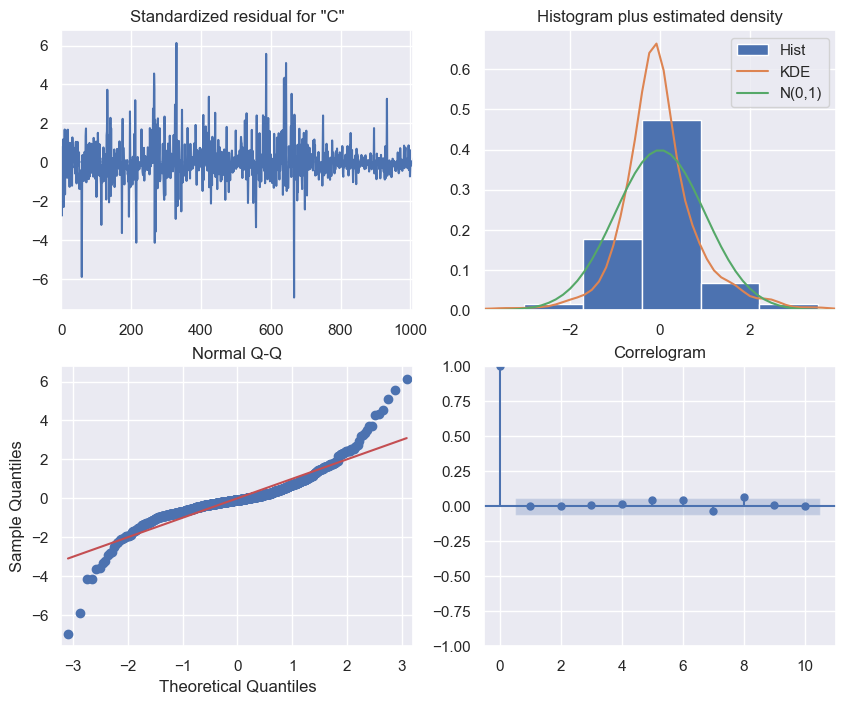

In [81]:
result_arima.plot_diagnostics(figsize=(10,8))
plt.show()

In [82]:
final_hat_test = test_final.copy()

In [83]:
test_arima = result_arima.forecast(steps=len(test_final))
test_arima 

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



1013    7.215430
1014    7.224449
1015    7.238924
1016    7.253167
1017    7.267182
          ...   
1230    8.102008
1231    8.102454
1232    8.102892
1233    8.103323
1234    8.103748
Name: predicted_mean, Length: 222, dtype: float64

In [84]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_final.Close, test_arima, squared=False))
print(rmse)

2.1881409742201057


In [85]:
# calculate MAPE( Mean absolute percentage error)

def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual))*100

In [86]:
mape = calculate_mape(test_final.Close, test_arima)
print("MAPE :", mape)

## Here it is and average model as in lies between 20-30 range 

MAPE : 29.23964192516354


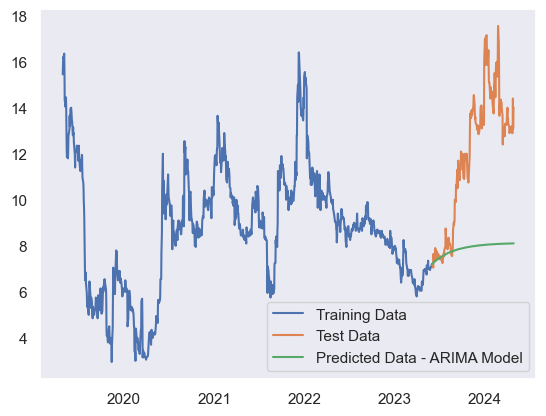

In [87]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Test Data')
plt.plot(test_final.index, test_arima, label='Predicted Data - ARIMA Model')
plt.legend(loc='best')
plt.grid()

In [88]:
RESULT = pd.DataFrame({'NAME': 'ARIMA' , 'AIC':result_arima.aic ,'param':'(1,0,2)' , 'RMSE':rmse , 'MAPE':mape} , index=[0] )

In [89]:
RESULT

,NAME,AIC,param,RMSE,MAPE
0,ARIMA,1144.674554,"(1,0,2)",2.188141,29.239642


## BUILDIMG SARIMA MODEL

In [90]:
import statsmodels.api as sm

In [91]:
parameter = []
AIC = []
seasonal = []
for param in pdq:
    for param_seasonal in model_pdq:
        model = sm.tsa.statespace.SARIMAX(train_final['Close'] , order=param , seasonal_order=param_seasonal , 
                   enforce_invertibility=False , enforce_stationarity=False)
        result_SARIMA = model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, result_SARIMA.aic))
        parameter.append(param)
        AIC.append(result_SARIMA.aic)
        seasonal.append(param_seasonal)

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date

SARIMA(0, 0, 0)x(0, 0, 0, 5)7 - AIC:7335.35196554424
SARIMA(0, 0, 0)x(0, 0, 1, 5)7 - AIC:6039.935002005172
SARIMA(0, 0, 0)x(0, 0, 2, 5)7 - AIC:5097.6887056454725
SARIMA(0, 0, 0)x(1, 0, 0, 5)7 - AIC:2657.710463834588


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 1, 5)7 - AIC:2654.5267349400174


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(1, 0, 2, 5)7 - AIC:2632.722911579015
SARIMA(0, 0, 0)x(2, 0, 0, 5)7 - AIC:2633.3544241579


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 1, 5)7 - AIC:2628.155389525749


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 0)x(2, 0, 2, 5)7 - AIC:2627.388445117842
SARIMA(0, 0, 1)x(0, 0, 0, 5)7 - AIC:5989.785694855523


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 1, 5)7 - AIC:4981.177857236007


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(0, 0, 2, 5)7 - AIC:4213.659892546407


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 0, 5)7 - AIC:2071.324485069023


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 1, 5)7 - AIC:2051.4094743139826


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(1, 0, 2, 5)7 - AIC:2032.8606041550347


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 0, 5)7 - AIC:2040.7137497976464


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 1, 5)7 - AIC:2037.0682920323247


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 1)x(2, 0, 2, 5)7 - AIC:2031.6607603471846
SARIMA(0, 0, 2)x(0, 0, 0, 5)7 - AIC:4870.586687446347


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 1, 5)7 - AIC:3817.5901710117096


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(0, 0, 2, 5)7 - AIC:3389.0309870293895


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 0, 5)7 - AIC:1795.6972092348065


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 1, 5)7 - AIC:1736.8402970120032


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(1, 0, 2, 5)7 - AIC:1877.27863984545


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 0, 5)7 - AIC:1743.206134351356


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(0, 0, 2)x(2, 0, 1, 5)7 - AIC:1721.8797049781567


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(0, 0, 2)x(2, 0, 2, 5)7 - AIC:1720.7054953331196
SARIMA(1, 0, 0)x(0, 0, 0, 5)7 - AIC:1156.2752851849577


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(0, 0, 1, 5)7 - AIC:1141.028342331849
SARIMA(1, 0, 0)x(0, 0, 2, 5)7 - AIC:1133.74011309927


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 0, 5)7 - AIC:1140.2936605191765


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 1, 5)7 - AIC:1138.2303481504982


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(1, 0, 2, 5)7 - AIC:1135.374365479337


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 0, 5)7 - AIC:1133.6681555302694


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 1, 5)7 - AIC:1135.3318974280742


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 0)x(2, 0, 2, 5)7 - AIC:1137.2011092033417
SARIMA(1, 0, 1)x(0, 0, 0, 5)7 - AIC:1154.6526004190712


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 1, 5)7 - AIC:1142.6293767581724


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(0, 0, 2, 5)7 - AIC:1132.3884017679156


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 0, 5)7 - AIC:1142.0108584995194


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 1, 5)7 - AIC:1138.4214087340283


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(1, 0, 2, 5)7 - AIC:1134.1312424511875


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 0, 5)7 - AIC:1135.2157543703356


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 1)x(2, 0, 1, 5)7 - AIC:1136.9462265720863


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(1, 0, 1)x(2, 0, 2, 5)7 - AIC:1134.9928112868204
SARIMA(1, 0, 2)x(0, 0, 0, 5)7 - AIC:1151.3458848324512
SARIMA(1, 0, 2)x(0, 0, 1, 5)7 - AIC:1139.09523021099


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(0, 0, 2, 5)7 - AIC:1128.4466736170575


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(1, 0, 0, 5)7 - AIC:1138.9435016786854


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(1, 0, 2)x(1, 0, 1, 5)7 - AIC:1135.0002778745509
SARIMA(1, 0, 2)x(1, 0, 2, 5)7 - AIC:1130.0866407585154


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 0, 5)7 - AIC:1131.7411387532084


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(1, 0, 2)x(2, 0, 1, 5)7 - AIC:1133.6087711032083


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(1, 0, 2)x(2, 0, 2, 5)7 - AIC:1131.893963849992
SARIMA(2, 0, 0)x(0, 0, 0, 5)7 - AIC:1154.6669812777461
SARIMA(2, 0, 0)x(0, 0, 1, 5)7 - AIC:1142.7990185681774


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(0, 0, 2, 5)7 - AIC:1135.503102825017


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 0, 5)7 - AIC:1141.924297841022


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(1, 0, 1, 5)7 - AIC:1138.4999475777001


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 0)x(1, 0, 2, 5)7 - AIC:1137.1391219234588
SARIMA(2, 0, 0)x(2, 0, 0, 5)7 - AIC:1132.6544907280443


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 0)x(2, 0, 1, 5)7 - AIC:1134.287742533394


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 0)x(2, 0, 2, 5)7 - AIC:1135.6191355103433
SARIMA(2, 0, 1)x(0, 0, 0, 5)7 - AIC:1156.4539438850443


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 1, 5)7 - AIC:1144.330651491905


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(0, 0, 2, 5)7 - AIC:1133.8324273722114


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 0, 5)7 - AIC:1143.549709250683


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 1)x(1, 0, 1, 5)7 - AIC:1139.9693552494862


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 1)x(1, 0, 2, 5)7 - AIC:1135.5022511021002
SARIMA(2, 0, 1)x(2, 0, 0, 5)7 - AIC:1134.0002828583463


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 1)x(2, 0, 1, 5)7 - AIC:1136.3477916253642


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 1)x(2, 0, 2, 5)7 - AIC:1137.9163258054007
SARIMA(2, 0, 2)x(0, 0, 0, 5)7 - AIC:1153.3484657541783
SARIMA(2, 0, 2)x(0, 0, 1, 5)7 - AIC:1141.0880591456175


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 2)x(0, 0, 2, 5)7 - AIC:1129.7161515135697
SARIMA(2, 0, 2)x(1, 0, 0, 5)7 - AIC:1140.822985615495


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 2)x(1, 0, 1, 5)7 - AIC:1136.9572670475939


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMA(2, 0, 2)x(1, 0, 2, 5)7 - AIC:1132.053425620486
SARIMA(2, 0, 2)x(2, 0, 0, 5)7 - AIC:1131.350837127497


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated freque

SARIMA(2, 0, 2)x(2, 0, 1, 5)7 - AIC:1133.125247186612
SARIMA(2, 0, 2)x(2, 0, 2, 5)7 - AIC:1136.2010748331181


C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [92]:
dfobj2 = pd.DataFrame(columns=['paramter','AIC' , 'seasonal'])

In [93]:
dfobj2['paramter'] = parameter 
dfobj2['AIC'] = AIC
dfobj2['seasonal'] = seasonal

In [94]:
dfobj2.sort_values(by='AIC')

,paramter,AIC,seasonal
47,"(1, 0, 2)",1128.446674,"(0, 0, 2, 5)"
74,"(2, 0, 2)",1129.716152,"(0, 0, 2, 5)"
50,"(1, 0, 2)",1130.086641,"(1, 0, 2, 5)"
78,"(2, 0, 2)",1131.350837,"(2, 0, 0, 5)"
51,"(1, 0, 2)",1131.741139,"(2, 0, 0, 5)"
...,...,...,...
10,"(0, 0, 1)",4981.177857,"(0, 0, 1, 5)"
2,"(0, 0, 0)",5097.688706,"(0, 0, 2, 5)"
9,"(0, 0, 1)",5989.785695,"(0, 0, 0, 5)"
1,"(0, 0, 0)",6039.935002,"(0, 0, 1, 5)"


In [95]:
## lowest value of aic for SARIMA MODEL IS: 1128.446674 for paramter: (1,0,2) and seasonal order = (0, 0, 2, 5)

sarima_model = sm.tsa.statespace.SARIMAX(train_final['Close'] , order=(1,0,2) , seasonal_order=(0, 0, 2, 5)
                                         , enforce_invertibility=False , enforce_stationarity=False)
result_sarima = sarima_model.fit()

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [96]:
print(result_sarima.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                 1013
Model:             SARIMAX(1, 0, 2)x(0, 0, 2, 5)   Log Likelihood                -558.223
Date:                           Mon, 29 Apr 2024   AIC                           1128.447
Time:                                   20:21:41   BIC                           1157.893
Sample:                                        0   HQIC                          1139.638
                                          - 1013                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9985      0.001    758.908      0.000       0.996       1.001
ma.L1         -0.0212      0.022     -0.960

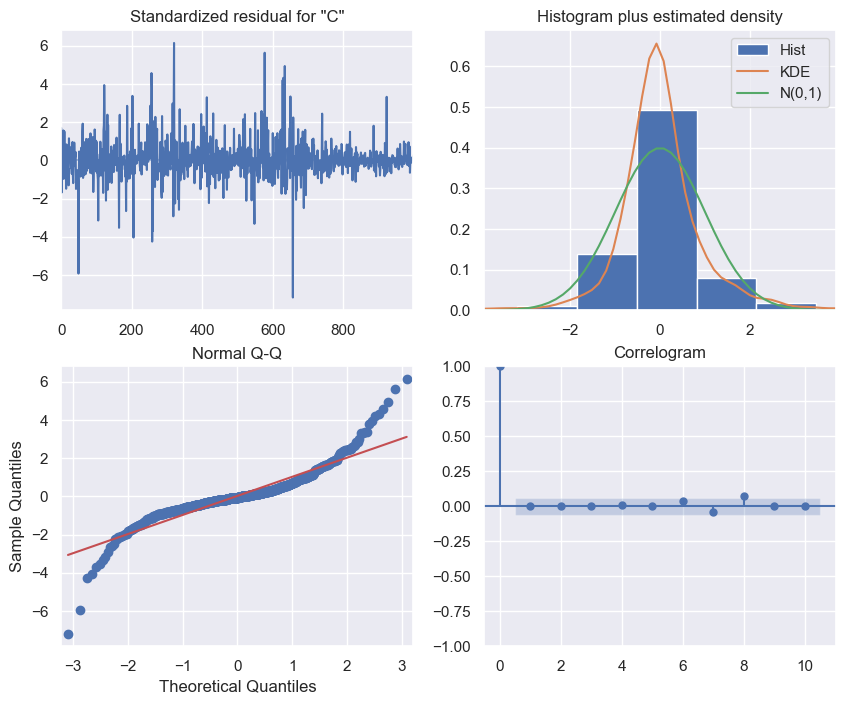

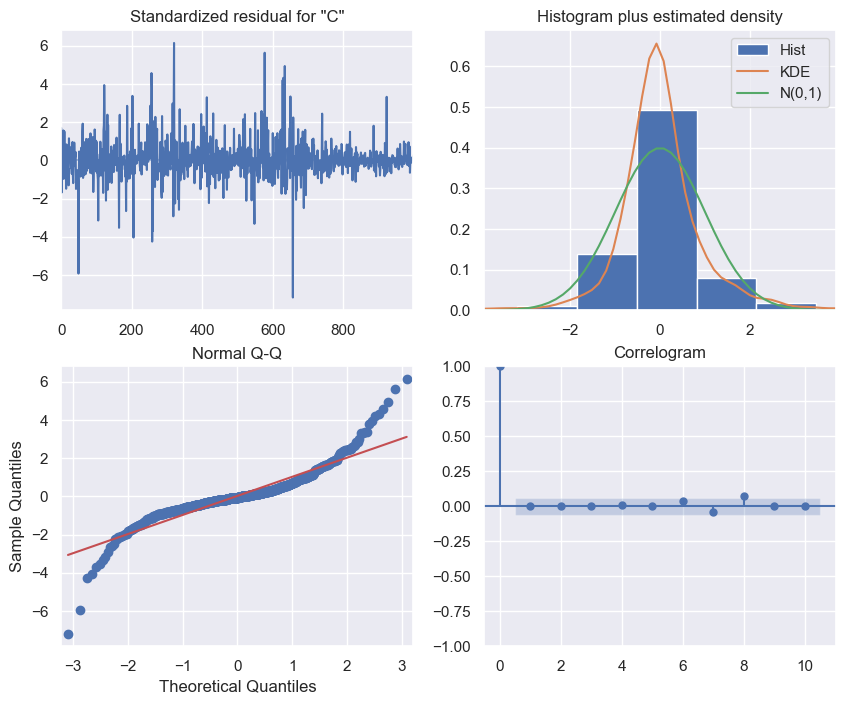

In [97]:
result_sarima.plot_diagnostics(figsize=(10,8))

In [98]:
final_hat_test_sarima = test_final.copy()

In [99]:
test_sarima = result_sarima.forecast(steps=len(test_final))

C:\Users\JoyBoy\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [100]:
test_sarima

1013    7.187930
1014    7.170369
1015    7.162041
1016    7.152134
1017    7.144918
          ...   
1230    5.170608
1231    5.162772
1232    5.154949
1233    5.147138
1234    5.139338
Name: predicted_mean, Length: 222, dtype: float64

In [101]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rsme2 = sqrt(mean_squared_error(test_final.Close , test_sarima , squared=False ))
print(rsme2)

2.583920683116275


In [102]:
mape2 = calculate_mape(test_final , test_sarima)
print(mape2)

## HERE THE VALUE OF MAPE IS IN RANGE OF 30 TO 50 WHICH SHOWS POOR MODEL 

44.51611199300768


In [103]:
 result_sarima

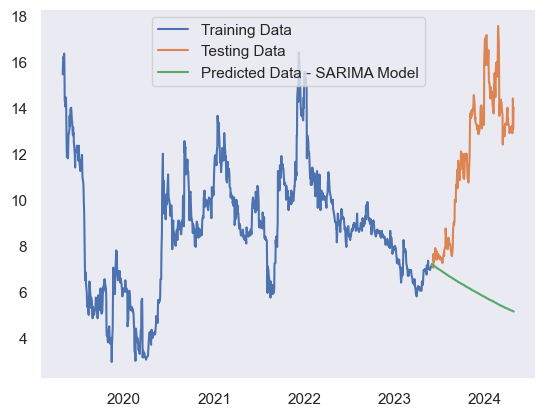

In [104]:
plt.plot(train_final, label='Training Data')
plt.plot(test_final, label='Testing Data')
plt.plot(test_final.index , test_sarima, label='Predicted Data - SARIMA Model')
plt.legend(loc='best')
plt.grid()

In [105]:
RESULT.head()

,NAME,AIC,param,RMSE,MAPE
0,ARIMA,1144.674554,"(1,0,2)",2.188141,29.239642


In [106]:
RESULT['seasonal_param'] = 'NA'

In [107]:
# Create a new row of data
new_data = {'NAME': 'SARIMA', 'AIC': result_sarima.aic, 'param': '(1,0,2)', 'RMSE': rsme2, 'MAPE': mape2, 'seasonal_param': '(0, 0, 2, 5)'}

# Calculate the index for the new row
new_index = len(RESULT)  # Assuming you want to add the new row at the end of the DataFrame

# Add the new row to the DataFrame using .loc
RESULT.loc[new_index] = new_data

In [108]:
RESULT.head()

,NAME,AIC,param,RMSE,MAPE,seasonal_param
0,ARIMA,1144.674554,"(1,0,2)",2.188141,29.239642,NA
1,SARIMA,1128.446674,"(1,0,2)",2.583921,44.516112,"(0, 0, 2, 5)"


## Building SARIMAX model - include external factor

In [109]:
### Lets Create exogeneious varibale
## HIGH OPEN VOLUME ADJ_CLOSE

In [111]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Days,timestamp,1st Diff
Date,,,,,,,,,,,
2019-04-30,16.10,16.200001,15.25,15.450000,15.450000,33729371,2019,4,30,2019-04-30,NaN
2019-05-02,15.35,16.549999,15.15,16.200001,16.200001,62636435,2019,5,2,2019-05-02,0.750001
2019-05-03,16.25,16.500000,15.90,16.150000,16.150000,26630328,2019,5,3,2019-05-03,-0.050001
2019-05-06,17.15,17.150000,16.25,16.350000,16.350000,45839027,2019,5,6,2019-05-06,0.200000
2019-05-07,16.40,16.600000,15.50,15.600000,15.600000,36754853,2019,5,7,2019-05-07,-0.750000
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,12.40,13.050000,12.10,12.900000,12.900000,608298209,2024,4,22,2024-04-22,0.000000
2024-04-23,13.00,14.750000,12.95,14.400000,14.400000,1073741823,2024,4,23,2024-04-23,1.500000
2024-04-24,13.75,13.950000,13.00,13.100000,13.100000,560864623,2024,4,24,2024-04-24,-1.300000
